In [1]:
import os
import json
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

# Setup data location

In [2]:
data_dir = '/datashare/datasets_3rd_party/CULane'
train_list = os.path.join(data_dir, 'list/train.txt')

# During training, the line width of the targets is set to 16 pixels, 
# and the input and target imagesare rescaled to 800 × 288 
# cf. https://arxiv.org/pdf/1712.06080.pdf

resize_image = True
image_ext = '.jpg'
new_w = 800
new_h = 288
thickness = 8

In [3]:
train_imgs = [f.rstrip('\n') for f in open(train_list, 'r')]

# Loading data and select the first image in the label list to visualize

In [4]:
img_file = train_imgs[0]
raw_file = data_dir + img_file

# Load the raw image. 

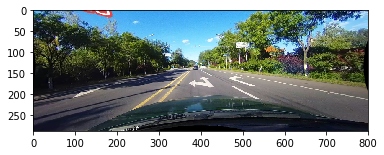

In [5]:
#img = plt.imread(raw_file)

#this will get the same result with plt.imread
img = cv2.imread(raw_file)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

w = img.shape[1] # 1640
h = img.shape[0] # 590

x_rate = 1.0 * new_w / w
y_rate = 1.0 * new_h / h

if resize_image:
    img = cv2.resize(img, (new_w, new_h))
    
plt.imshow(img)
plt.show()

In [6]:
label_file = raw_file.replace(image_ext, '.lines.txt')
label_lines = [[float(x) for x in f.split()] for f in open(label_file, 'r')]

# Draw the ground-truth points

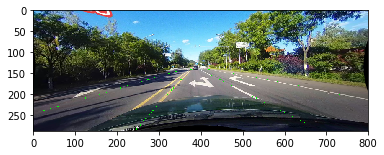

In [11]:
# gt_lanes_vis = [[(x, y) for (x, y) in zip(lane, y_samples) if x >= 0] for lane in gt_lanes]
gt_lanes_vis = [list(zip(lane[0::2], lane[1::2])) for lane in label_lines]

if resize_image:
    gt_lanes_vis = [[(int(x*x_rate), int(y*y_rate)) for (x, y) in lane] for lane in gt_lanes_vis] 
    
img_vis = img.copy()

for lane in gt_lanes_vis:
    for pt in lane:
        cv2.circle(img_vis, pt, radius=thickness, color=(0, 255, 0))

plt.imshow(img_vis)
plt.show()

# Fit the ground truth points with a lines

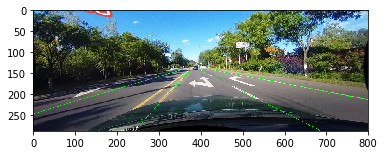

In [9]:
img_vis = img.copy()

for lane in gt_lanes_vis:
    cv2.polylines(img_vis, np.int32([lane]), isClosed=False, color=(0,255,0), thickness=thickness)

plt.imshow(img_vis)
plt.show()

# Generate binary image

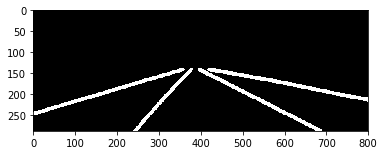

In [67]:
bin_img = np.zeros(shape=[img.shape[0], img.shape[1]], dtype=np.uint8)
nlanes = len(gt_lanes_vis)
for i, lane in enumerate(gt_lanes_vis):
    cv2.polylines(bin_img, np.int32([lane]), isClosed=False, color=1, thickness=thickness)
plt.imshow(bin_img, cmap=plt.cm.gray)
plt.show()    

# Generate lane instance image (different colors for different lanes)

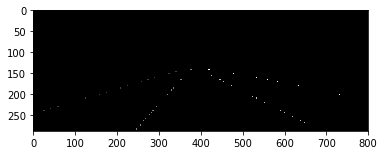

In [15]:
bin_img = np.zeros(shape=[img.shape[0], img.shape[1]], dtype=np.uint8)
nlanes = len(gt_lanes_vis)
color_codes = list(range(0, 255, 255//(nlanes + 1)))[1:]
for i, lane in enumerate(gt_lanes_vis):
    #cv2.polylines(bin_img, np.int32([lane]), isClosed=False, color=color_codes[i], thickness=thickness)
    for pt in lane:
        cv2.circle(bin_img, pt, radius=1, color=color_codes[i])
plt.imshow(bin_img, cmap=plt.cm.gray)
plt.show()    